In [1]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Specify the full file path with quotes
file_path = "C:\\Users\\nehma\\OneDrive\\Desktop\\Final Achievement\\Achievement_2\\new_2022_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, index_col=0)

C:\Users\nehma\AppData\Local\Temp\ipykernel_9048\3663249288.py:5: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, index_col=0)


In [3]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,_merge
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,2022-01-18 08:23:52,2022-01-18,-2.0,both
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member,2022-01-21 09:03:22,2022-01-21,-10.0,both
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member,2022-01-22 14:28:32,2022-01-22,-5.0,both
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member,2022-01-19 14:49:47,2022-01-19,-1.1,both
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member,2022-01-16 14:36:06,2022-01-16,-6.9,both


In [4]:
df.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,avgTemp,_merge
30689916,CB2EE50F60A58C7B,classic_bike,2022-12-12 08:38:46,2022-12-12 08:46:12,E 41 St & Madison Ave (SW corner),6474.12,6 Ave & W 33 St,6364.07,40.752165,-73.979922,40.749013,-73.988484,member,2022-12-12 08:38:46,2022-12-12,3.6,both
30689917,3C0DF3280FEB1350,classic_bike,2022-12-12 13:06:32,2022-12-12 13:19:58,Peck Slip & South St,5096.12,Vesey St & Church St,5216.06,40.707689,-74.001254,40.712220,-74.010472,member,2022-12-12 13:06:32,2022-12-12,3.6,both
30689918,B916E63B630D5020,classic_bike,2022-12-18 01:15:22,2022-12-18 01:48:15,E 41 St & Madison Ave (SW corner),6474.12,Lenox Ave & W 111 St,7602.05,40.752399,-73.980150,40.798786,-73.952300,member,2022-12-18 01:15:22,2022-12-18,-7.0,both
30689919,21EAC007BE7D4161,classic_bike,2022-12-08 23:09:54,2022-12-08 23:26:37,W 37 St & 10 Ave,6611.02,W 70 St & Amsterdam Ave,7207.08,40.756604,-73.997901,40.777480,-73.982886,member,2022-12-08 23:09:54,2022-12-08,2.5,both
30689920,538408C4A16F4415,electric_bike,2022-12-21 07:26:14,2022-12-21 07:31:40,W 37 St & 10 Ave,6611.02,6 Ave & W 33 St,6364.07,40.756604,-73.997901,40.749013,-73.988484,member,2022-12-21 07:26:14,2022-12-21,-6.7,both


In [5]:
df.shape

(30689921, 17)

#3In the data set from the previous task, create a new column with the value of 1. Then create a new aggregated dataframe that contains 3 columns: starting station, ending station, and the count of trips between those stations.

In [6]:
# Create a new column with a constant value of 1 to represent each trip
df['trip_count'] = 1

In [7]:
df_group = df.groupby(['start_station_name', 'end_station_name'])['trip_count'].count().reset_index()


In [8]:
df_group

,start_station_name,end_station_name,trip_count
0,1 Ave & E 110 St,1 Ave & E 110 St,1473
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12
...,...,...,...
1013409,Yankee Ferry Terminal,Water St & Main St,4
1013410,Yankee Ferry Terminal,West St & Chambers St,6
1013411,Yankee Ferry Terminal,West St & Liberty St,4
1013412,Yankee Ferry Terminal,West Thames St,1


In [9]:
print(df_group['trip_count'].sum())
print(df.shape)

30618148
(30689921, 18)


In [10]:
df_group['trip_count'].describe()

count    1.013414e+06
mean     3.021287e+01
std      1.110286e+02
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.700000e+01
max      1.407100e+04
Name: trip_count, dtype: float64

Some exploratory analysis into the trips

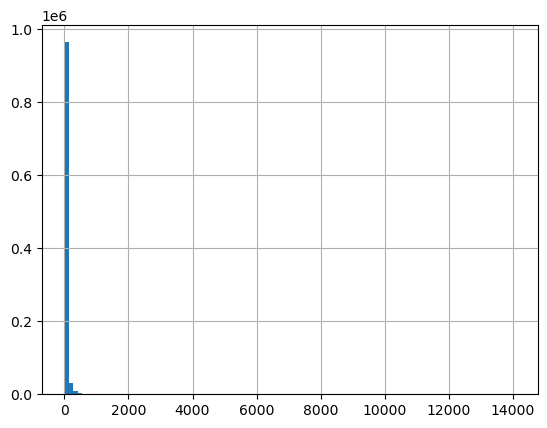

In [11]:
df_group['trip_count'].hist(bins = 100)
plt.show()

[]

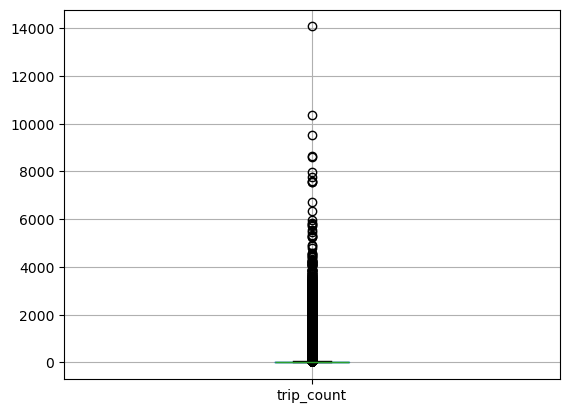

In [12]:
b_plot = df_group.boxplot(column = 'trip_count') 
b_plot.plot()

In [13]:
df_group['trip_count'].sort_index().value_counts()

trip_count
1       268271
2       128310
3        78056
4        54838
5        40759
         ...  
1543         1
1038         1
1250         1
1569         1
5965         1
Name: count, Length: 2065, dtype: int64

In [14]:
df_group.to_csv('df_groupby_final.csv')

In [15]:
df_group.head()

,start_station_name,end_station_name,trip_count
0,1 Ave & E 110 St,1 Ave & E 110 St,1473
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12


In [16]:
# Merge df_group with the original ride data based on start_station_name and end_station_name
merged_df = pd.merge(df_group, df[['start_station_name', 'end_station_name']], 
                     on=['start_station_name', 'end_station_name'], how='left')

# Display the merged DataFrame
print(merged_df.head())

  start_station_name  end_station_name  trip_count
0   1 Ave & E 110 St  1 Ave & E 110 St        1473
1   1 Ave & E 110 St  1 Ave & E 110 St        1473
2   1 Ave & E 110 St  1 Ave & E 110 St        1473
3   1 Ave & E 110 St  1 Ave & E 110 St        1473
4   1 Ave & E 110 St  1 Ave & E 110 St        1473


In [17]:
merged_df.tail(5)

,start_station_name,end_station_name,trip_count
30618143,Yankee Ferry Terminal,Yankee Ferry Terminal,5965
30618144,Yankee Ferry Terminal,Yankee Ferry Terminal,5965
30618145,Yankee Ferry Terminal,Yankee Ferry Terminal,5965
30618146,Yankee Ferry Terminal,Yankee Ferry Terminal,5965
30618147,Yankee Ferry Terminal,Yankee Ferry Terminal,5965


In [18]:
# Merge df_group with the original ride data based on start_station_name and end_station_name
merged1_df = pd.merge(df_group, df[['start_station_name', 'end_station_name', 
                                    'start_lat', 'start_lng', 'end_lat', 'end_lng']], 
                     on=['start_station_name', 'end_station_name'], how='left')

In [19]:
merged1_df.head(5)

,start_station_name,end_station_name,trip_count,start_lat,start_lng,end_lat,end_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.792327,-73.9383,40.792327,-73.9383
1,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.792327,-73.9383,40.792327,-73.9383
2,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.792327,-73.9383,40.792327,-73.9383
3,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.792327,-73.9383,40.792327,-73.9383
4,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.792327,-73.9383,40.792327,-73.9383


In [59]:
merged1_df.tail(5)

,start_station_name,end_station_name,trip_count,start_lat,start_lng,end_lat,end_lng
3110838,Yankee Ferry Terminal,Water St & Main St,4,40.69,-74.02,40.70,-73.99
3110839,Yankee Ferry Terminal,West St & Chambers St,6,40.69,-74.02,40.72,-74.01
3110840,Yankee Ferry Terminal,West St & Liberty St,4,40.69,-74.02,40.71,-74.01
3110841,Yankee Ferry Terminal,West Thames St,1,40.69,-74.02,40.71,-74.02
3110842,Yankee Ferry Terminal,Yankee Ferry Terminal,5965,40.69,-74.02,40.69,-74.02


In [60]:
# Sort the DataFrame by the "trip_count" column in descending order
merged1_df_sorted = merged1_df.sort_values(by='trip_count', ascending=False)

In [61]:
merged1_df_sorted.head(5)

,start_station_name,end_station_name,trip_count,start_lat,start_lng,end_lat,end_lng
853449,Central Park S & 6 Ave,Central Park S & 6 Ave,14071,40.76,-73.98,40.77,-73.98
853417,Central Park S & 6 Ave,Central Park S & 6 Ave,14071,40.77,-73.98,40.77,-73.98
853427,Central Park S & 6 Ave,Central Park S & 6 Ave,14071,40.77,-73.96,40.77,-73.98
384550,7 Ave & Central Park South,7 Ave & Central Park South,10342,40.77,-73.98,40.77,-73.98
384566,7 Ave & Central Park South,7 Ave & Central Park South,10342,40.76,-73.97,40.77,-73.98


In [37]:
# Reset the index of the DataFrame
merged1_df.reset_index(drop=True, inplace=True)


In [45]:
import pandas as pd

# Round latitude and longitude values to a specific decimal place
merged1_df['start_lat'] = merged1_df['start_lat'].round(2)
merged1_df['start_lng'] =merged1_df['start_lng'].round(2)
merged1_df['end_lat'] = merged1_df['end_lat'].round(2)
merged1_df['end_lng'] = merged1_df['end_lng'].round(2)

# Remove duplicate rows
merged1_df = merged1_df.drop_duplicates()

# Print the first few rows to verify the removal of duplicates
print(merged1_df.head())


   start_station_name  end_station_name  trip_count  start_lat  start_lng  \
0    1 Ave & E 110 St  1 Ave & E 110 St        1473      40.79     -73.94   
19   1 Ave & E 110 St  1 Ave & E 110 St        1473      40.81     -73.95   
31   1 Ave & E 110 St   1 Ave & E 18 St           2      40.79     -73.94   
32   1 Ave & E 110 St   1 Ave & E 30 St           4      40.79     -73.94   
34   1 Ave & E 110 St   1 Ave & E 39 St           1      40.79     -73.94   

    end_lat  end_lng  
0     40.79   -73.94  
19    40.79   -73.94  
31    40.73   -73.98  
32    40.74   -73.98  
34    40.75   -73.97  


In [46]:
merged1_df.head(5)

,start_station_name,end_station_name,trip_count,start_lat,start_lng,end_lat,end_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.79,-73.94,40.79,-73.94
19,1 Ave & E 110 St,1 Ave & E 110 St,1473,40.81,-73.95,40.79,-73.94
31,1 Ave & E 110 St,1 Ave & E 18 St,2,40.79,-73.94,40.73,-73.98
32,1 Ave & E 110 St,1 Ave & E 30 St,4,40.79,-73.94,40.74,-73.98
34,1 Ave & E 110 St,1 Ave & E 39 St,1,40.79,-73.94,40.75,-73.97


In [48]:
merged1_df.shape

(1052538, 7)

In [49]:
import gc # this is garbage collector - speeds up performance
gc.collect()

884

#4.Initialize an instance of a kepler.gl map.

In [50]:
merged1_df.to_csv('df_group_locations_for_map.csv', index=False)


In [53]:
# Create KeplerGl instance

m = KeplerGl(height = 700, data={"data_1": merged1_df})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':             start_station_name       end_station_name  trip_count  start_lat  \
0    …

#6.Add a filter to your map and use it to see what the most common trips are in New York City. What else makes an impression? For example, are there any zones that seem particularly busy? Using some additional research, write a few sentences to make sense of that output

In [52]:
m1 = KeplerGl(height = 700, data={"data_1": merged1_df})
m1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':             start_station_name       end_station_name  trip_count  start_lat  \
0    …

It appears that the most common trips in New York City involve stations "Central Park S & 6 Ave" and "7 Ave & Central Park South.This suggests that these stations are major transportation hubs or are located in areas with high activity or demand for bike sharing services.Additionally, we might observe that there are multiple trips with the same start and end stations but with different trip counts. This could indicate variations in demand throughout the day, week, or year, reflecting different commuting patterns, tourist flows, or events happening in the city. 

#7. Create a config object and save your map with it

In [62]:
config = m.config

In [63]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [64]:
m.save_to_html(file_name = 'New York Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to New York Bike Trips Aggregated.html!


In [65]:
config1 = m1.config

In [66]:
m1.save_to_html(file_name = 'New York Bike Trips Aggregated1.html', read_only = False, config = config)

Map saved to New York Bike Trips Aggregated1.html!
